<a href="https://colab.research.google.com/github/KarthikChapa/HumanVsComputer-TicTacToe/blob/main/image_detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


Importing Data

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

Normalizing the data

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
train_images[3].shape

(32, 32, 3)

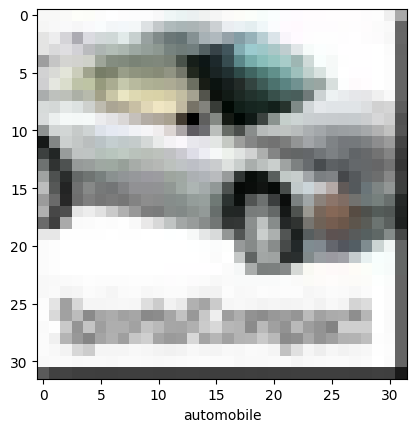

In [ ]:
IMG_INDEX = 79

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 56320 

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=8,
                    validation_data=(test_images, test_labels))

Epoch 1/8
1563/1563 [==============================] - 82s 51ms/step - loss: 1.5554 - accuracy: 0.4329 - val_loss: 1.2510 - val_accuracy: 0.5504
Epoch 2/8
1563/1563 [==============================] - 73s 47ms/step - loss: 1.1811 - accuracy: 0.5800 - val_loss: 1.1030 - val_accuracy: 0.6053
Epoch 3/8
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0233 - accuracy: 0.6380 - val_loss: 1.0101 - val_accuracy: 0.6419
Epoch 4/8
1563/1563 [==============================] - 70s 45ms/step - loss: 0.9185 - accuracy: 0.6763 - val_loss: 0.9187 - val_accuracy: 0.6800
Epoch 5/8
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8485 - accuracy: 0.7037 - val_loss: 0.9520 - val_accuracy: 0.6745
Epoch 6/8
1563/1563 [==============================] - 70s 45ms/step - loss: 0.7886 - accuracy: 0.7230 - val_loss: 0.8748 - val_accuracy: 0.6965
Epoch 7/8
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7405 - accuracy: 0.7395 - val_loss: 0.8508 - val_ac

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print("Percentage Accuracy = ", test_acc *100)

313/313 - 5s - loss: 0.8456 - accuracy: 0.7131 - 5s/epoch - 15ms/step
Percentage Accuracy =  71.3100016117096


**DATA** **AUGMENTATION**

In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

test_img = train_images[20]
img = image.img_to_array(test_img)
img = img.reshape((1,) + img.shape)

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 8:
        break

plt.show()

In [ ]:
img.shape

(1, 32, 32, 3)